#Question 1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv
Saving Syndata-test.csv to Syndata-test.csv
Saving Syndata-train.csv to Syndata-train.csv


In [10]:
import pandas as pd

train_data = pd.read_csv('/content/Syndata-train.csv')
test_data = pd.read_csv('/content/Syndata-test.csv')

##Part 1

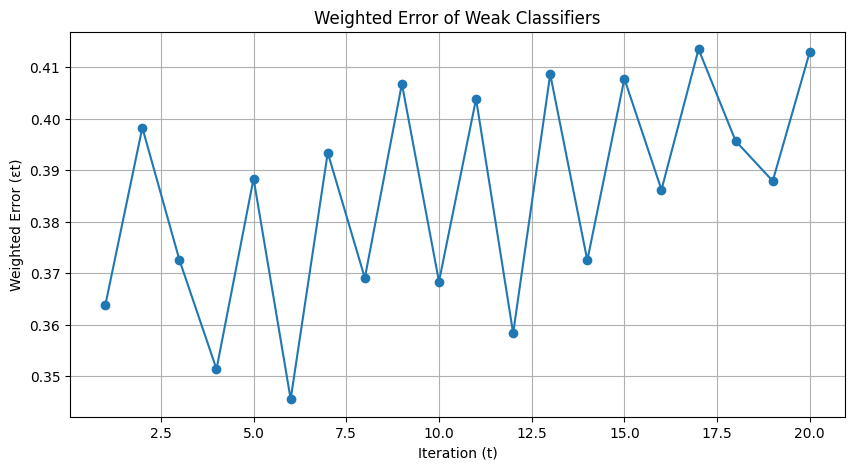

(0.4134407016784718, 17)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

def weighted_error(y, y_pred, weights):
    return sum(weights * (y != y_pred))

def best_stump(X, y, weights):
    n_samples, n_features = X.shape
    best_stump = DecisionStump()
    min_error = float('inf')

    for feature in range(n_features):
        feature_values = np.sort(np.unique(X[:, feature]))
        thresholds = (feature_values[:-1] + feature_values[1:]) / 2

        for threshold in thresholds:
            for polarity in [-1, 1]:
                y_pred = np.ones(n_samples)
                y_pred[polarity * X[:, feature] < polarity * threshold] = -1
                error = weighted_error(y, y_pred, weights)

                if error < min_error:
                    best_stump.polarity = polarity
                    best_stump.threshold = threshold
                    best_stump.feature_index = feature
                    min_error = error

    return best_stump, min_error

def adaboost(X_train, y_train, X_test, num_iter=20):
    n_samples, _ = X_train.shape
    weights = np.full(n_samples, (1 / n_samples))
    stumps = []
    errors = []

    for _ in range(num_iter):
        stump, error = best_stump(X_train, y_train, weights)
        alpha = 0.5 * np.log((1.0 - error) / (error + 1e-10))
        stump.alpha = alpha
        stumps.append(stump)

        y_pred = np.ones(n_samples)
        negative_idx = (stump.polarity * X_train[:, stump.feature_index] < stump.polarity * stump.threshold)
        y_pred[negative_idx] = -1
        weights *= np.exp(-alpha * y_train * y_pred)
        weights /= np.sum(weights)

        errors.append(error)

    def predict(X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for stump in stumps:
            predictions = np.ones(n_samples)
            negative_idx = (stump.polarity * X[:, stump.feature_index] < stump.polarity * stump.threshold)
            predictions[negative_idx] = -1
            y_pred += stump.alpha * predictions
        return np.sign(y_pred)

    y_pred = predict(X_test)
    return y_pred, errors

X_train = train_data[['feature1', 'feature2']].to_numpy()
y_train = train_data['label'].to_numpy()
X_test = test_data[['feature1', 'feature2']].to_numpy()

y_pred, errors = adaboost(X_train, y_train, X_test, num_iter=20)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), errors, marker='o')
plt.title('Weighted Error of Weak Classifiers')
plt.xlabel('Iteration (t)')
plt.ylabel('Weighted Error (εt)')
plt.grid(True)
plt.show()

max_error = max(errors)
max_error_iter = errors.index(max_error) + 1
max_error, max_error_iter


<div dir="rtl" style="font-family: BNazanin; text-align: justify;">


حداکثر خطای یک دسته‌بند ضعیف تقریباً 0.4134 است و در شماره تکرار 17 رخ می‌دهد.
این نشان می‌دهد که در تکرارهای آخر الگوریتم آدابوست، decision stump که انتخاب میکند، نسبت به تکرارهای قبلی خطای وزن‌دار بیشتری را داشته است. به طور کلی در آدابوست، با پیشروی تکرارها، الگوریتم بیشتر بر روی نمونه‌هایی که سخت‌تر کلسیفای میشن با افزایش وزنشون تمرکز می‌کند. بنابراین،  خطاهای بیشتر در تکرارهای بعدی،  به این خاطر است که الگوریتم سعی در طبقه‌بندی مثال‌هایی با چالش بیشتر در مجموعه داده دارد.
</div>

##Part 2

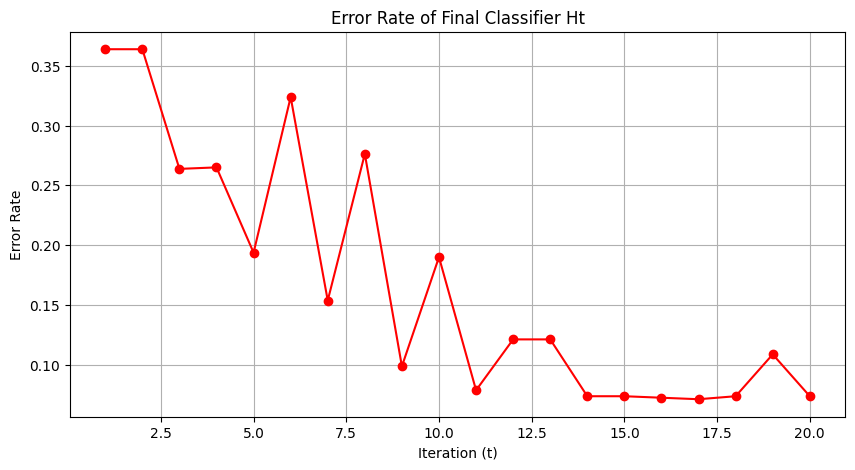

[0.36375,
 0.36375,
 0.26375,
 0.265,
 0.19375,
 0.32375,
 0.15375,
 0.27625,
 0.09875,
 0.19,
 0.07875,
 0.12125,
 0.12125,
 0.07375,
 0.07375,
 0.0725,
 0.07125,
 0.07375,
 0.10875,
 0.07375]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

def weighted_error(y, y_pred, weights):
    return sum(weights * (y != y_pred))

def best_stump(X, y, weights):
    n_samples, n_features = X.shape
    best_stump = DecisionStump()
    min_error = float('inf')

    for feature in range(n_features):
        feature_values = np.sort(np.unique(X[:, feature]))
        thresholds = (feature_values[:-1] + feature_values[1:]) / 2

        for threshold in thresholds:
            for polarity in [-1, 1]:
                y_pred = np.ones(n_samples)
                y_pred[polarity * X[:, feature] < polarity * threshold] = -1
                error = weighted_error(y, y_pred, weights)

                if error < min_error:
                    best_stump.polarity = polarity
                    best_stump.threshold = threshold
                    best_stump.feature_index = feature
                    min_error = error

    return best_stump, min_error

def calculate_final_classifier_error(X, y, stumps):
    n_samples = X.shape[0]
    y_pred_final = np.zeros(n_samples)

    for stump in stumps:
        predictions = np.ones(n_samples)
        negative_idx = (stump.polarity * X[:, stump.feature_index] < stump.polarity * stump.threshold)
        predictions[negative_idx] = -1
        y_pred_final += stump.alpha * predictions

    y_pred_final = np.sign(y_pred_final)
    return np.mean(y_pred_final != y)

def adaboost_with_final_classifier_error(X_train, y_train, num_iter):
    n_samples, _ = X_train.shape
    weights = np.full(n_samples, (1 / n_samples))
    stumps = []
    final_errors = []

    for _ in range(num_iter):
        stump, error = best_stump(X_train, y_train, weights)
        alpha = 0.5 * np.log((1.0 - error) / (error + 1e-10))
        stump.alpha = alpha
        stumps.append(stump)

        y_pred = np.ones(n_samples)
        negative_idx = (stump.polarity * X_train[:, stump.feature_index] < stump.polarity * stump.threshold)
        y_pred[negative_idx] = -1
        weights *= np.exp(-alpha * y_train * y_pred)
        weights /= np.sum(weights)

        final_error = calculate_final_classifier_error(X_train, y_train, stumps)
        final_errors.append(final_error)

    return stumps, final_errors

X_train = train_data[['feature1', 'feature2']].to_numpy()
y_train = train_data['label'].to_numpy()

_, final_errors_train = adaboost_with_final_classifier_error(X_train, y_train, 20)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), final_errors_train, marker='o', color='r')
plt.title('Error Rate of Final Classifier Ht')
plt.xlabel('Iteration (t)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

final_errors_train


<div dir="rtl" style="font-family: BNazanin; text-align: justify;">

نرخ خطا برچسب‌دهنده نهایی Ht در داده‌های آموزش برای هر تکرار از الگوریتم آدابوست محاسبه و رسم شده است.

از نمودار، مشاهده می‌کنیم:

1. نرخ خطا در ابتدا نوسان می‌کند که نشان می‌دهد الگوریتم آدابوست در حال سازگاری با داده است. در چند تکرار اول، الگوریتم نمونه‌های اشتباه طبقه‌بندی شده را شناسایی کرده و وزن بیشتری به آن‌ها می‌دهد که منجر به تغییرات قابل توجهی در نرخ خطا می‌شود.

2.  پس از نوسانات اولیه، نرخ خطا شروع به کاهش می‌کند که نشان می‌دهد مجموعه برچسب‌دهنده‌های ضعیف (درخت‌های تصمیم) در طبقه‌بندی داده‌های آموزش دقیق‌تر می‌شود.

3.  به سوی تکرارهای بعدی، نرخ خطا تمایل به ثابت شدن دارد. این ثابت شدن نشان می‌دهد که الگوریتم آدابوست با موفقیت خطا را در مجموعه آموزش کمینه کرده است و تکرارهای بعدی تغییرات کوچکتری ایجاد می‌کنند.

4.  نرخ خطاهای نهایی نسبتاً کم است که نشان می‌دهد که طبقه‌بند آدابوست عملکرد خوبی در مجموعه داده آموزش دارد.

این نمودار کارآمدیت آدابوست در بهبود عملکرد طبقه‌بندی به صورت تکراری با تمرکز بیشتر بر روی نمونه‌هایی که سخت به طبقه‌بندی هستند و تنظیم برچسب‌دهنده‌های ضعیف را نشان می‌دهد.
</div>

##Part 3

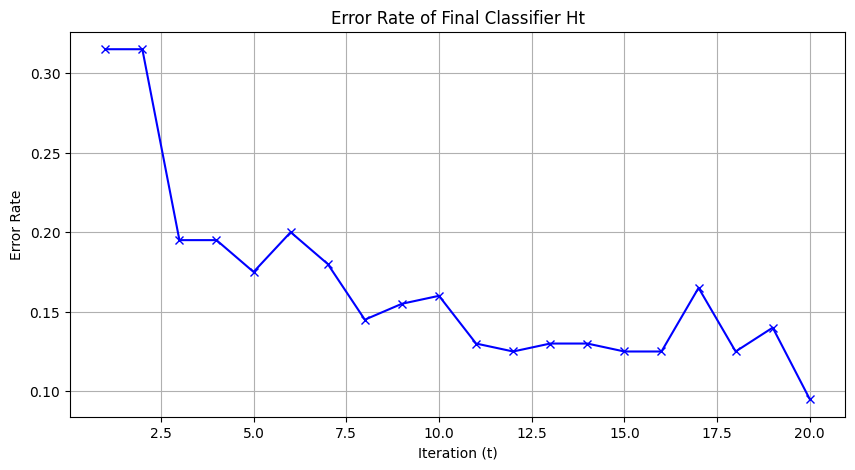

[0.315,
 0.315,
 0.195,
 0.195,
 0.175,
 0.2,
 0.18,
 0.145,
 0.155,
 0.16,
 0.13,
 0.125,
 0.13,
 0.13,
 0.125,
 0.125,
 0.165,
 0.125,
 0.14,
 0.095]

In [18]:
X_test = test_data[['feature1', 'feature2']].to_numpy()
y_test = test_data['label'].to_numpy()

_, final_errors_test = adaboost_with_final_classifier_error(X_test, y_test, 20)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), final_errors_test, marker='x', color='b')
plt.title('Error Rate of Final Classifier Ht')
plt.xlabel('Iteration (t)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

final_errors_test

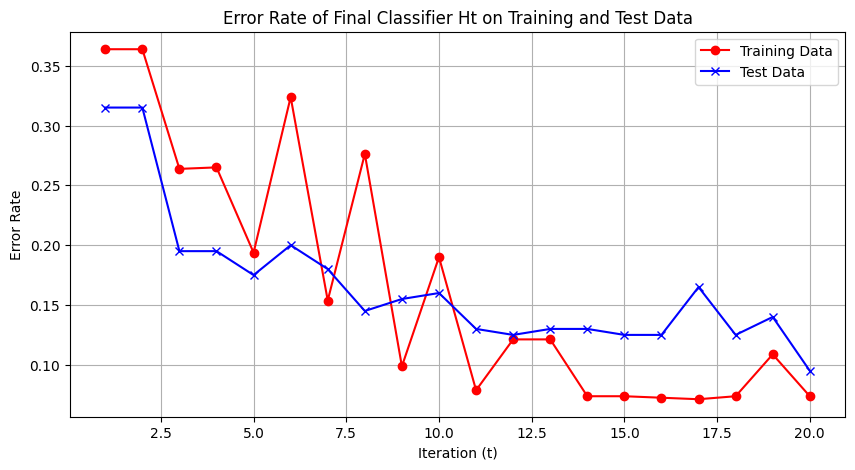

In [14]:
# Plotting both sets of errors on the same graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), final_errors_train, marker='o', color='r', label='Training Data')
plt.plot(range(1, 21), final_errors_test, marker='x', color='b', label='Test Data')
plt.title('Error Rate of Final Classifier Ht on Training and Test Data')
plt.xlabel('Iteration (t)')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

<div dir="rtl" style="font-family: BNazanin; text-align: justify;">

1.  این نمودار نرخ خطا یک اندازه‌گیری از عملکرد مجموعه weak classifiers (decision stumps، در این مورد) در داده‌هایی که قبلاً دیده نشده‌اند، است.

2.
   - **کاهش نرخ خطا**: اگر نرخ خطا در هر تکرار کاهش یابد، نشان‌دهنده این است که الگوریتم آدابوست در طول زمان عملکرد خوبی در داده‌های آزمایشی دارد و عملیات خوبی برای تعمیم داده‌ها به داده‌های دیده نشده انجام می‌دهد.
   - **افزایش یا نوسان نرخ خطا**: اگر نرخ خطا با افزایش تعداد تکرارها افزایش یا نوسان قابل توجهی داشته باشد، ممکن است نشان‌دهنده بیش‌برازش (overfitting) روی داده‌های آموزش باشد، به این معنی که مدل بیش از حد ویژگی‌های خاص داده‌های آموزش را یاد گرفته‌ و توانایی پیش‌بینی در داده‌های دیده نشده را از دست داده است.

3.   این مقایسه به ما نشان می‌دهد که مدل چقدر خوب از داده‌های آموزش به داده‌های آزمایشی تعمیم می‌دهد.


</div>

##Part 4

In [15]:
T_values = [20, 50, 100, 200, 500, 1000, 2000, 4000]
final_errors_train = []
final_errors_test = []

for T in T_values:
    _, errors_train = adaboost_with_final_classifier_error(X_train, y_train, T)
    _, errors_test = adaboost_with_final_classifier_error(X_test, y_test, T)
    final_errors_train.append(errors_train[-1])
    final_errors_test.append(errors_test[-1])


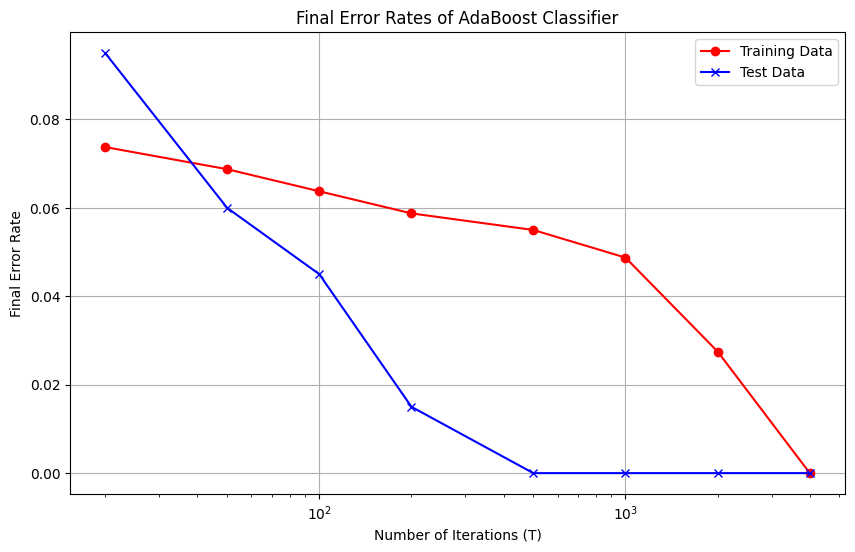

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(T_values, final_errors_train, marker='o', color='r', label='Training Data')
plt.plot(T_values, final_errors_test, marker='x', color='b', label='Test Data')
plt.xscale('log')
plt.xlabel('Number of Iterations (T)')
plt.ylabel('Final Error Rate')
plt.title('Final Error Rates of AdaBoost Classifier')
plt.legend()
plt.grid(True)
plt.show()